X - наборы изображений 28*28

y - метки классов

In [1]:
import tensorflow.keras as keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
len(y_train)

60000

In [4]:
len(y_test)

10000

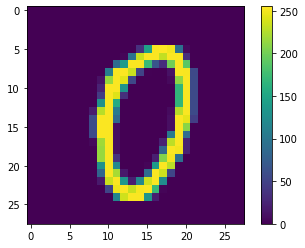

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1000, :, :])
plt.colorbar()
plt.show()

Изменяем датафрейм для работы с TensorFlow

In [6]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

In [7]:
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

Преобразовываем метки классов в категориальный признак (0 - нет, 1 - да)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Создаем модель сверточной нейронной сети

Фильтр слоя сети - 3х3, фильтр pooling - 2x2

In [10]:
from keras import models
from keras import layers
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, 'relu'),
    layers.Dense(10, 'softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 149s 143ms/step - loss: 0.3399 - accuracy: 0.8918
Epoch 2/5
938/938 [==============================] - 133s 142ms/step - loss: 0.0412 - accuracy: 0.9874
Epoch 3/5
938/938 [==============================] - 134s 143ms/step - loss: 0.0292 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 132s 140ms/step - loss: 0.0214 - accuracy: 0.9932
Epoch 5/5
938/938 [==============================] - 132s 140ms/step - loss: 0.0147 - accuracy: 0.9956


Проверим качество работы обученной модели нейросети

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.0235 - accuracy: 0.9922


In [15]:
test_acc

0.9922000169754028